EDA - NLP

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as ss
from sklearn.decomposition import PCA

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
data = pd.read_csv('data_wrangled_reviews_amazon.csv')

In [4]:
data.head()

,Rating,Rating_Sentiment,Review_Title,Review,Review_str_len,Title_str_len,title_word_tokenize,Review_word_tokenize,title_wtoken_cnt,Review_wtoken_cnt,Cleaned_Review,review_punc_stop_words_removed,review_removed_cnt,porterStemmer,WordNet_Lemmatizer,actually,album,author,away,bad,best,better,big,bit,book,books,bought,buy,characters,come,day,did,different,disappointed,does,dvd,easy,end,excellent,fan,far,feel,film,fun,game,going,good,got,great,hard,interesting,just,know,life,like,little,long,look,looking,lot,love,make,makes,money,movie,music,need,new,nice,old,people,play,pretty,price,problem,product,purchased,quality,quite,read,reading,real,really,recommend,right,say,series,set,small,song,songs,sound,stars,story,sure,thing,things,think,thought,time,times,try,use,used,using,version,want,watch,way,work,works,worth,written,year,years,likert_scale
0,3,Neutral,more like funchuck,gave this to my dad for a gag gift after direc...,93,18,"['more', 'like', 'funchuck']","['gave', 'this', 'to', 'my', 'dad', 'for', 'a'...",3,24,"['gave', 'this', 'to', 'my', 'dad', 'for', 'a'...","['gave', 'dad', 'gag', 'gift', 'directing', 'n...",9,"['gave', 'this', 'to', 'my', 'dad', 'for', 'a'...","['gave', 'this', 'to', 'my', 'dad', 'for', 'a'...",0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,Average
1,5,Positive,inspiring,i hope a lot of people hear this cd. we need m...,204,9,['inspiring'],"['i', 'hope', 'a', 'lot', 'of', 'people', 'hea...",1,44,"['i', 'hope', 'a', 'lot', 'of', 'people', 'hea...","['hope', 'lot', 'people', 'hear', 'need', 'str...",22,"['i', 'hope', 'a', 'lot', 'of', 'people', 'hea...","['i', 'hope', 'a', 'lot', 'of', 'people', 'hea...",0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.354125,0.000000,0.0,0.0,0.0,0.0,0.3223,0.0,0.0,0.0,0.0,0.505512,0.0,0.0,0.0,0.000000,0.0,0.00000,0.526946,0.0,0.0,0.0,0.487344,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,Good
2,5,Positive,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...,470,37,"['the', 'best', 'soundtrack', 'ever', 'to', 'a...","['i', ""'m"", 'reading', 'a', 'lot', 'of', 'revi...",7,101,"['i', 'm', 'reading', 'a', 'lot', 'of', 'revie...","['reading', 'lot', 'saying', 'best', 'game', '...",34,"['i', ""'m"", 'reading', 'a', 'lot', 'of', 'revi...","['i', ""'m"", 'reading', 'a', 'lot', 'of', 'revi...",0.0,0.0,0.0,0.0,0.0,0.232661,0.000000,0.0,0.269069,0.0,0.0,0.0,0.22406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277307,0.0,0.0,0.297224,0.26315,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.254460,0.0,0.0,0.0,0.250122,0.0,0.25311,0.000000,0.0,0.0,0.0,0.000000,0.0,0.270344,0.263845,0.0,0.0,0.0,0.0,0.0,0.0,0.252474,0.0,0.000000,0.0,0.0,0.249233,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.259357,0.0,0.0,0.248148,Good
3,4,Not Considered,chrono cross ost,the music of yasunori misuda is without questi...,393,16,"['chrono', 'cross', 'ost']","['the', 'music', 'of', 'yasunori', 'misuda', '...",3,76,"['the', 'music', 'of', 'yasunori', 'misuda', '...","['music', 'yasunori', 'misuda', 'question', 'c...",36,"['the', 'music', 'of', 'yasunori', 'misuda', '...","['the', 'music', 'of', 'yasunori', 'misuda', '..."

In [5]:
data.columns

Index(['Rating', 'Rating_Sentiment', 'Review_Title', 'Review',
       'Review_str_len', 'Title_str_len', 'title_word_tokenize',
       'Review_word_tokenize', 'title_wtoken_cnt', 'Review_wtoken_cnt',
       ...
       'want', 'watch', 'way', 'work', 'works', 'worth', 'written', 'year',
       'years', 'likert_scale'],
      dtype='object', length=116)

In [6]:
data['Review_word_tokenize'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3000000 entries, 0 to 2999999
Series name: Review_word_tokenize
Non-Null Count    Dtype 
--------------    ----- 
3000000 non-null  object
dtypes: object(1)
memory usage: 22.9+ MB


In [7]:
!pip install wordcloud

In [8]:
from wordcloud import WordCloud

In [9]:
#Creating word Cloud
def showWordCloud(words):
    word_cloud = WordCloud(background_color="white").generate(words)
    plt.imshow(word_cloud)
    plt.show()

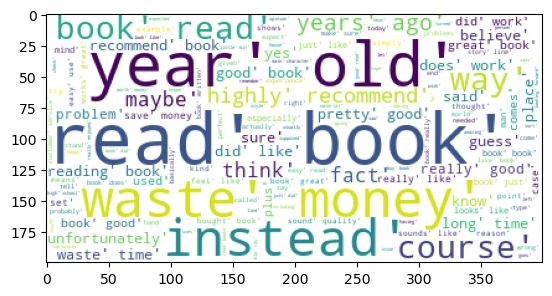

In [10]:
showWordCloud(''.join(data["review_punc_stop_words_removed"].astype(str)))

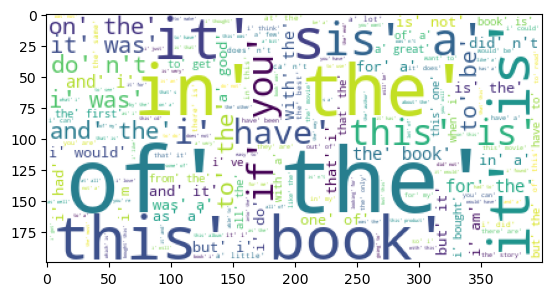

In [11]:
# review Review_word_tokenize
showWordCloud(''.join(data["Review_word_tokenize"].astype(str)))

In [12]:
data.columns

Index(['Rating', 'Rating_Sentiment', 'Review_Title', 'Review',
       'Review_str_len', 'Title_str_len', 'title_word_tokenize',
       'Review_word_tokenize', 'title_wtoken_cnt', 'Review_wtoken_cnt',
       ...
       'want', 'watch', 'way', 'work', 'works', 'worth', 'written', 'year',
       'years', 'likert_scale'],
      dtype='object', length=116)

In [13]:
neutral_rating = data[data["Rating"]==3]

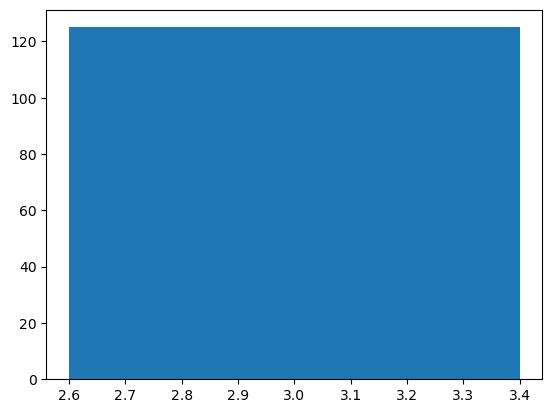

In [14]:
_ = plt.bar(neutral_rating["Rating"], neutral_rating["review_removed_cnt"])
plt.show()

In [15]:
data.groupby('Rating')['Review_wtoken_cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1,600000.0,86.117843,47.628336,1.0,47.0,77.0,118.0,592.0
2,600000.0,92.680263,49.087062,4.0,52.0,85.0,128.0,284.0
3,600000.0,90.495652,50.025043,1.0,48.0,82.0,127.0,400.0
4,600000.0,86.523008,49.802306,1.0,44.0,77.0,122.0,501.0
5,600000.0,78.719663,47.553018,1.0,39.0,67.0,109.0,452.0


In [16]:
filtered_data = data[data['Review_word_tokenize'] == '$']
print(filtered_data)

Empty DataFrame
Columns: [Rating, Rating_Sentiment, Review_Title, Review, Review_str_len, Title_str_len, title_word_tokenize, Review_word_tokenize, title_wtoken_cnt, Review_wtoken_cnt, Cleaned_Review, review_punc_stop_words_removed, review_removed_cnt, porterStemmer, WordNet_Lemmatizer, actually, album, author, away, bad, best, better, big, bit, book, books, bought, buy, characters, come, day, did, different, disappointed, does, dvd, easy, end, excellent, fan, far, feel, film, fun, game, going, good, got, great, hard, interesting, just, know, life, like, little, long, look, looking, lot, love, make, makes, money, movie, music, need, new, nice, old, people, play, pretty, price, problem, product, purchased, quality, quite, read, reading, real, really, recommend, right, say, series, set, small, song, songs, sound, stars, story, sure, thing, things, think, thought, time, ...]
Index: []


In [17]:
print(data['Review_word_tokenize'].unique())

['[\'gave\', \'this\', \'to\', \'my\', \'dad\', \'for\', \'a\', \'gag\', \'gift\', \'after\', \'directing\', \'``\', \'nunsense\', \',\', "\'\'", \'he\', \'got\', \'a\', \'reall\', \'kick\', \'out\', \'of\', \'it\', \'!\']'
 "['i', 'hope', 'a', 'lot', 'of', 'people', 'hear', 'this', 'cd', '.', 'we', 'need', 'more', 'strong', 'and', 'positive', 'vibes', 'like', 'this', '.', 'great', 'vocals', ',', 'fresh', 'tunes', ',', 'cross-cultural', 'happiness', '.', 'her', 'blues', 'is', 'from', 'the', 'gut', '.', 'the', 'pop', 'sounds', 'are', 'catchy', 'and', 'mature', '.']"
 '[\'i\', "\'m", \'reading\', \'a\', \'lot\', \'of\', \'reviews\', \'saying\', \'that\', \'this\', \'is\', \'the\', \'best\', "\'game", \'soundtrack\', "\'", \'and\', \'i\', \'figured\', \'that\', \'i\', "\'d", \'write\', \'a\', \'review\', \'to\', \'disagree\', \'a\', \'bit\', \'.\', \'this\', \'in\', \'my\', \'opinino\', \'is\', \'yasunori\', \'mitsuda\', "\'s", \'ultimate\', \'masterpiece\', \'.\', \'the\', \'music\', \'i

In [18]:
# Making a histogram of the Review Count variable.
#_ = plt.hist(data['review_punc_stop_words_removed'])
#_ = plt.xlabel('Word tokenized range')
#_ = plt.ylabel('Word tokenized count')
#plt.show()

In [19]:
rating3 = data[data['Rating'] ==3]['Review_wtoken_cnt']
print(rating3.head())

0     24
13    65
15    31
19    66
20    70
Name: Review_wtoken_cnt, dtype: int64


In [20]:
stats_rating3 = ss.normaltest(rating3)
print(stats_rating3)

NormaltestResult(statistic=np.float64(59535.70866559383), pvalue=np.float64(0.0))


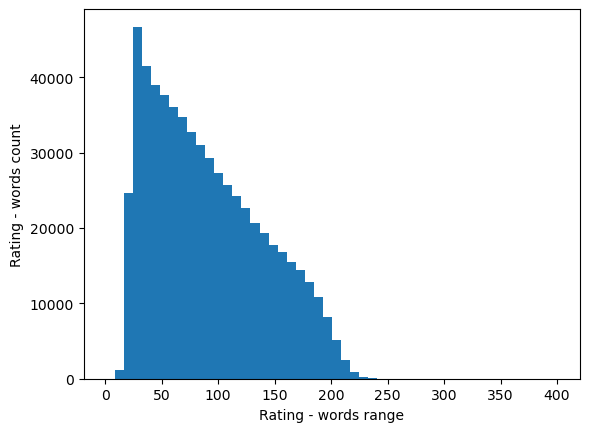

In [21]:
# Making a histogram of the Review Count variable.
_ = plt.hist(data[data['Rating'] ==3]['Review_wtoken_cnt'],bins=50)
_ = plt.xlabel('Rating - words range')
_ = plt.ylabel('Rating - words count')
plt.show()

In [22]:
def hist_matplot(data,bins_range,xlabel,ylabel,title="title"):
    _ = plt.hist(data,bins=bins_range)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    _ = plt.title(title)
    plt.show()

In [23]:
def confidence_interval(data,min,max):
    ci_range = np.percentile(data,[min,max])
    print("ci_range = ",ci_range)

Making a histogram of the Review Count variable for various ratings abnd their ci -range.

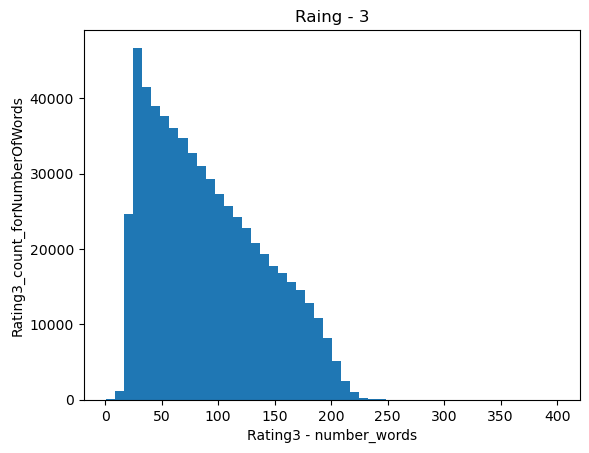

ci_range =  [ 23. 194.]


In [24]:
# rating 3
hist_matplot(data[data['Rating'] ==3]['Review_wtoken_cnt'],50,"Rating3 - number_words","Rating3_count_forNumberOfWords","Raing - 3")
confidence_interval(data[data['Rating'] ==3]['Review_wtoken_cnt'],2.5,97.5)

This shows the most of the Reviews for the Rating 3 are between 23 words and 194 words which is less than 200 words

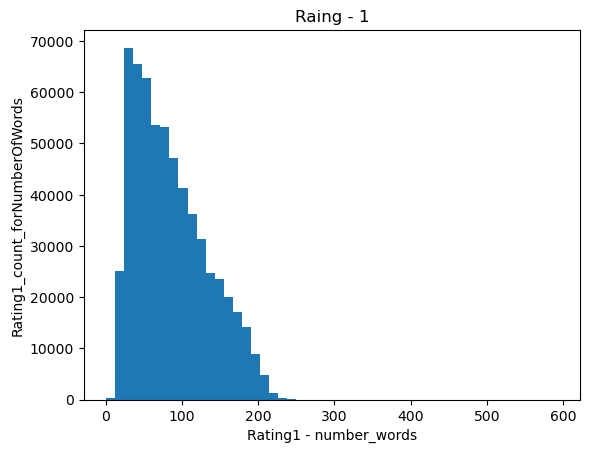

ci_range =  [ 23. 191.]


In [25]:
# rating 1
hist_matplot(data[data['Rating'] ==1]['Review_wtoken_cnt'],50,"Rating1 - number_words","Rating1_count_forNumberOfWords","Raing - 1")
confidence_interval(data[data['Rating'] ==1]['Review_wtoken_cnt'],2.5,97.5)

This shows the most of the Reviews for the Rating 1 are between 23 words and 191 words which is less than 200 words

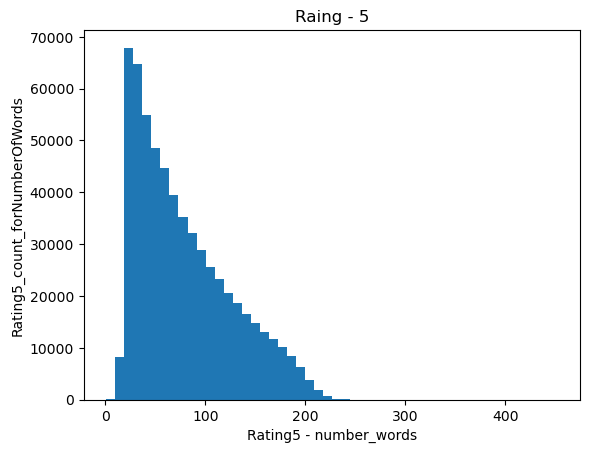

ci_range =  [ 21. 188.]


In [26]:
# rating 5
hist_matplot(data[data['Rating'] ==5]['Review_wtoken_cnt'],50,"Rating5 - number_words","Rating5_count_forNumberOfWords","Raing - 5")
confidence_interval(data[data['Rating'] ==5]['Review_wtoken_cnt'],2.5,97.5)

This shows the most of the Reviews for the Rating 5 are between 21 words and 188 words which is less than 200 words

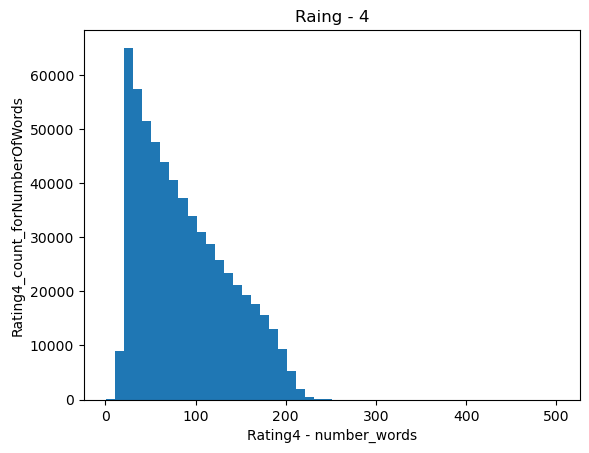

ci_range =  [ 22. 193.]


In [27]:
# rating 4
hist_matplot(data[data['Rating'] ==4]['Review_wtoken_cnt'],50,"Rating4 - number_words","Rating4_count_forNumberOfWords","Raing - 4")
confidence_interval(data[data['Rating'] ==4]['Review_wtoken_cnt'],2.5,97.5)

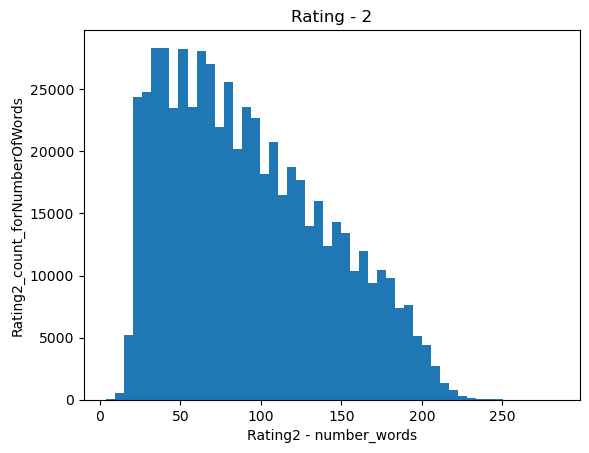

ci_range =  [ 23. 194.]


In [28]:
# rating 2
hist_matplot(data[data['Rating'] ==2]['Review_wtoken_cnt'],50,"Rating2 - number_words","Rating2_count_forNumberOfWords","Rating - 2")
confidence_interval(data[data['Rating'] ==2]['Review_wtoken_cnt'],2.5,97.5)

This shows the most of the Reviews for the Rating 2 are between 23 words and 194 words which is less than 200 words

The minimum words range used in most of the Reviews are between 21 to 194 words

In [29]:
import re
from collections import Counter

In [30]:
#Bar Chart of Top N Words (based on total frequency)
all_words = []
for text in data['Review_word_tokenize']:
    all_words.extend(re.findall(r'\b\w+\b', text.lower())) # Extract all words

In [31]:
def get_all_words(words):
    all_words = []
    for text in words:
       all_words.extend(re.findall(r'\b\w+\b', text.lower())) 
    return all_words

In [32]:
# Bar plot to show the Top Most Frequent words (by default 50 words)

def bar_most_frequent_words(top_words,top_counts,top_n=50,xlabel="Words"):
    plt.figure(figsize=(20, 6))
    plt.bar(top_words, top_counts)
    plt.xlabel(xlabel)
    plt.ylabel('Total Frequency')
    plt.title(f'Top {top_n} Most Frequent Words')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [33]:
word_counts = Counter(all_words)
top_n = 50  # Adjust as needed
most_common_words = word_counts.most_common(top_n)
print(most_common_words)
top_words, top_counts = zip(*most_common_words)

[('the', 12150897), ('i', 6857314), ('and', 6228270), ('a', 5894180), ('to', 5706099), ('it', 5413041), ('of', 4640186), ('is', 4216591), ('this', 4121330), ('in', 2776833), ('for', 2507673), ('that', 2488561), ('was', 2155765), ('you', 2010588), ('but', 1948875), ('not', 1850881), ('s', 1747993), ('with', 1705226), ('on', 1675988), ('have', 1574774), ('t', 1545097), ('n', 1532483), ('book', 1527698), ('my', 1433448), ('are', 1367224), ('as', 1360356), ('be', 1085620), ('one', 1077695), ('if', 951201), ('so', 944035), ('all', 902505), ('like', 881838), ('they', 878792), ('do', 867194), ('very', 822714), ('good', 819783), ('would', 791399), ('just', 783362), ('at', 771219), ('from', 751656), ('or', 727314), ('out', 682279), ('about', 682198), ('an', 662392), ('more', 652775), ('great', 650542), ('has', 643021), ('me', 633382), ('there', 625017), ('had', 612690)]


In [34]:
# get top n most Frequent words
def get_top_most_frequent_words(words,top_n,xlabel):
    word_counts = Counter(get_all_words(words))
    most_common_words = word_counts.most_common(top_n)
    top_words, top_counts = zip(*most_common_words)
    print(top_words)
    bar_most_frequent_words(top_words,top_counts,top_n,xlabel)

('the', 'i', 'and', 'a', 'to', 'it', 'of', 'is', 'this', 'in', 'for', 'that', 'was', 'you', 'but', 'not', 's', 'with', 'on', 'have', 't', 'n', 'book', 'my', 'are', 'as', 'be', 'one', 'if', 'so', 'all', 'like', 'they', 'do', 'very', 'good', 'would', 'just', 'at', 'from', 'or', 'out', 'about', 'an', 'more', 'great', 'has', 'me', 'there', 'had', 'what', 'when', 'will', 'up', 'get', 'can', 'by', 'some', 'he', 'read', 'only', 'did', 'time', 'no', 'his', 'really', 'well', 'does', 'movie', 'your')


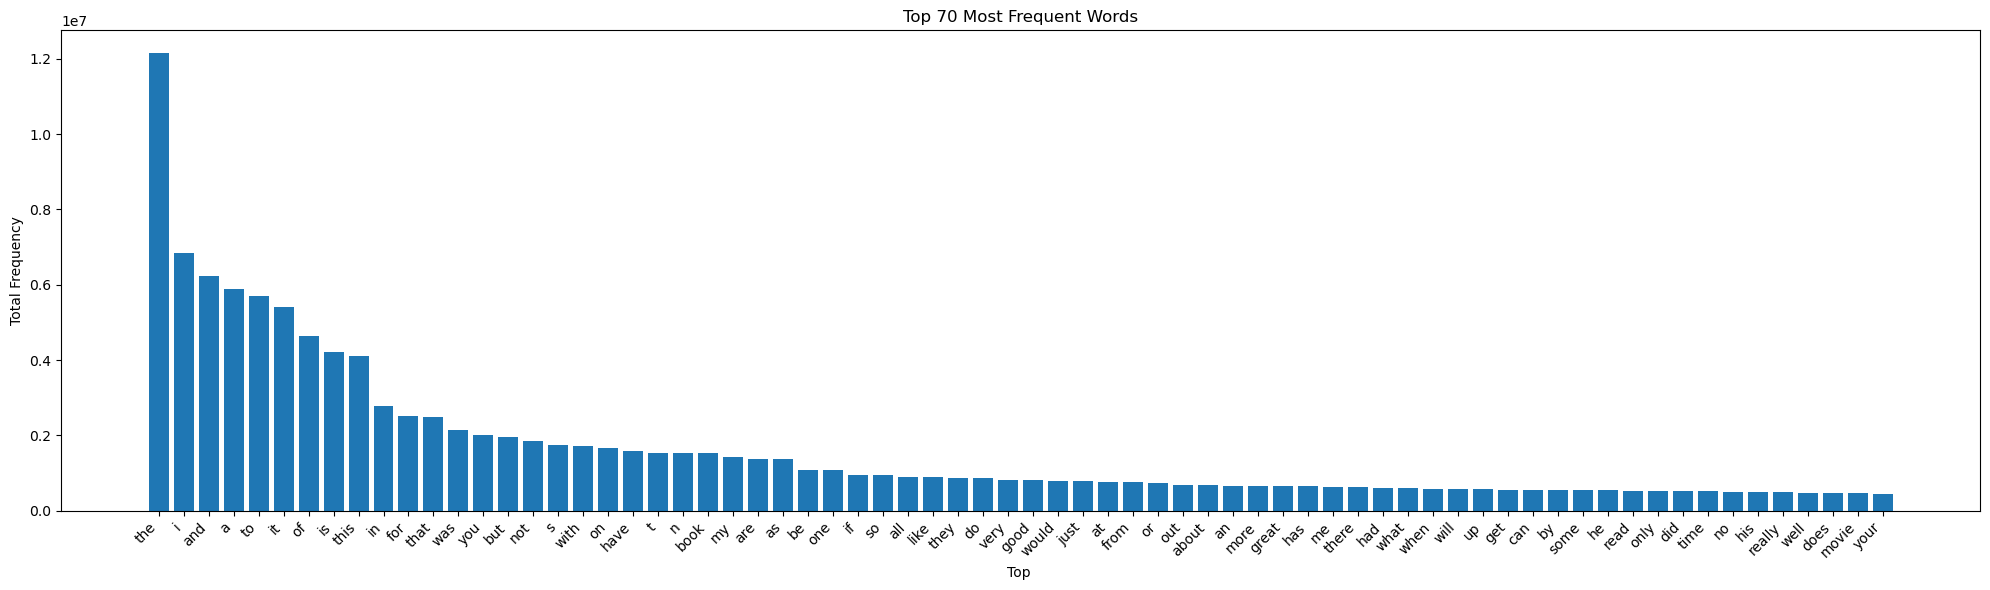

In [35]:
# most frequent words in Entire Dataset
get_top_most_frequent_words(data['Review_word_tokenize'],70,"Top ")

('the', 'i', 'a', 'and', 'to', 'it', 'of', 'is', 'this', 'in', 'that', 'but', 'for', 'was', 'not', 'you', 's', 'on', 'with', 't', 'n', 'have', 'book', 'as', 'are', 'my', 'be', 'if', 'good', 'one', 'like', 'so', 'they', 'would', 'do', 'just', 'all', 'very', 'more', 'at', 'or', 'from', 'there', 'some', 'out', 'an', 'about', 'me', 'has', 'had', 'did', 'what', 'when', 'up', 'get', 'great', 'really', 'by', 'he', 'much', 'does', 'will', 'his', 'read', 'can', 'only', 'than', 'other', 'well', 'movie')


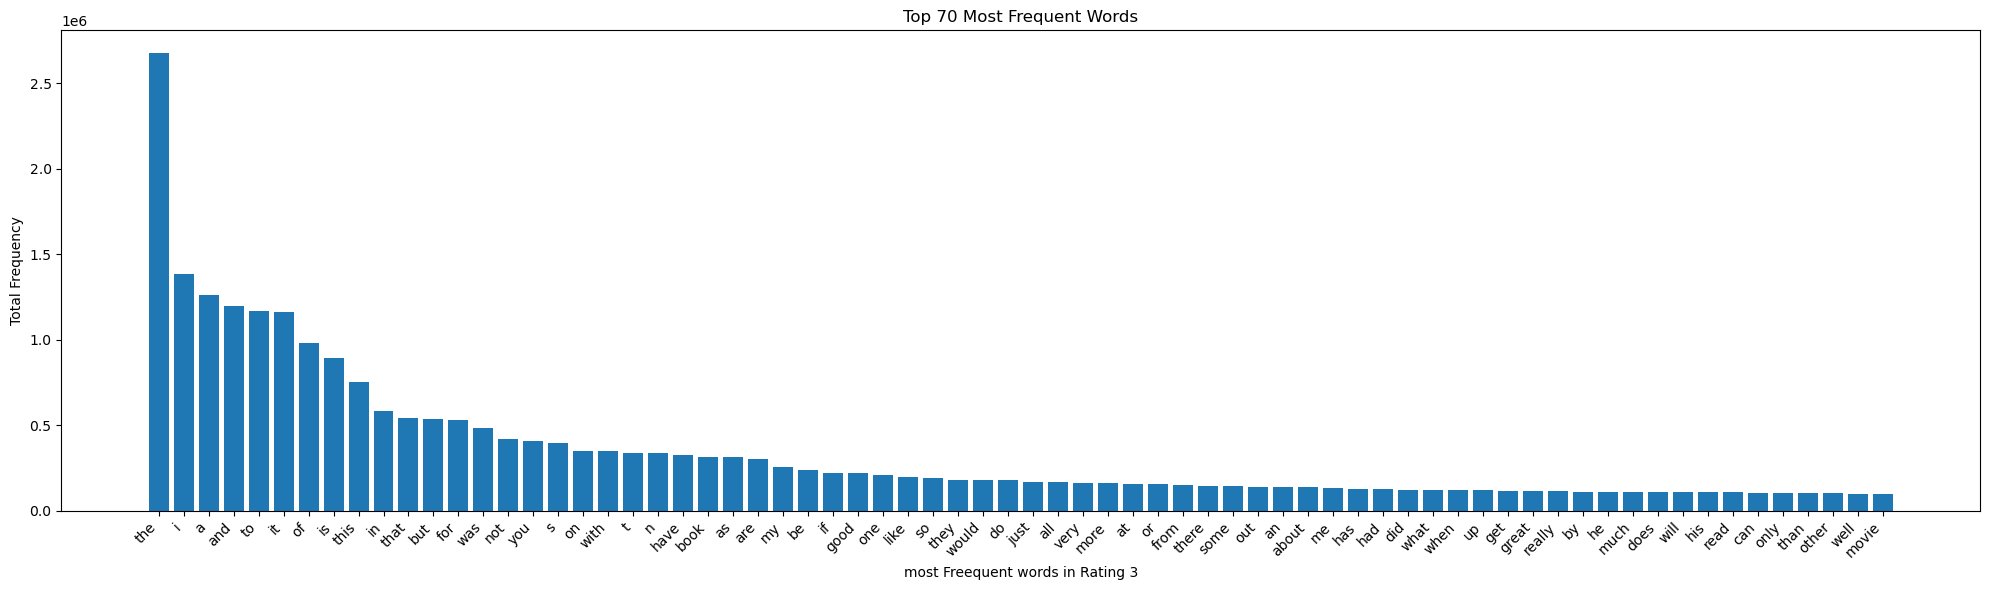

In [36]:
# most Freequent words in Rating 3
get_top_most_frequent_words(data[data['Rating']==3]['Review_word_tokenize'],70, "most Freequent words in Rating 3" )   

('the', 'and', 'i', 'a', 'to', 'it', 'of', 'this', 'is', 'in', 'for', 'you', 'that', 'my', 's', 'with', 'book', 'was', 'have', 'on', 'as', 'are', 'but', 'one', 'great', 't', 'n', 'not', 'all', 'so', 'be', 'very', 'they', 'has', 'if', 'like', 'from', 'at', 'an', 'just', 'read', 'will', 'can', 'about', 'me', 'good', 'do', 'love', 'out', 'or', 'he', 'more', 'his', 'when', 'what', 'by', 'well', 'time', 'would', 'up', 'had', 'we', 'who', 'best', 'your', 'get', 'her', 'there', 'really', 'them')


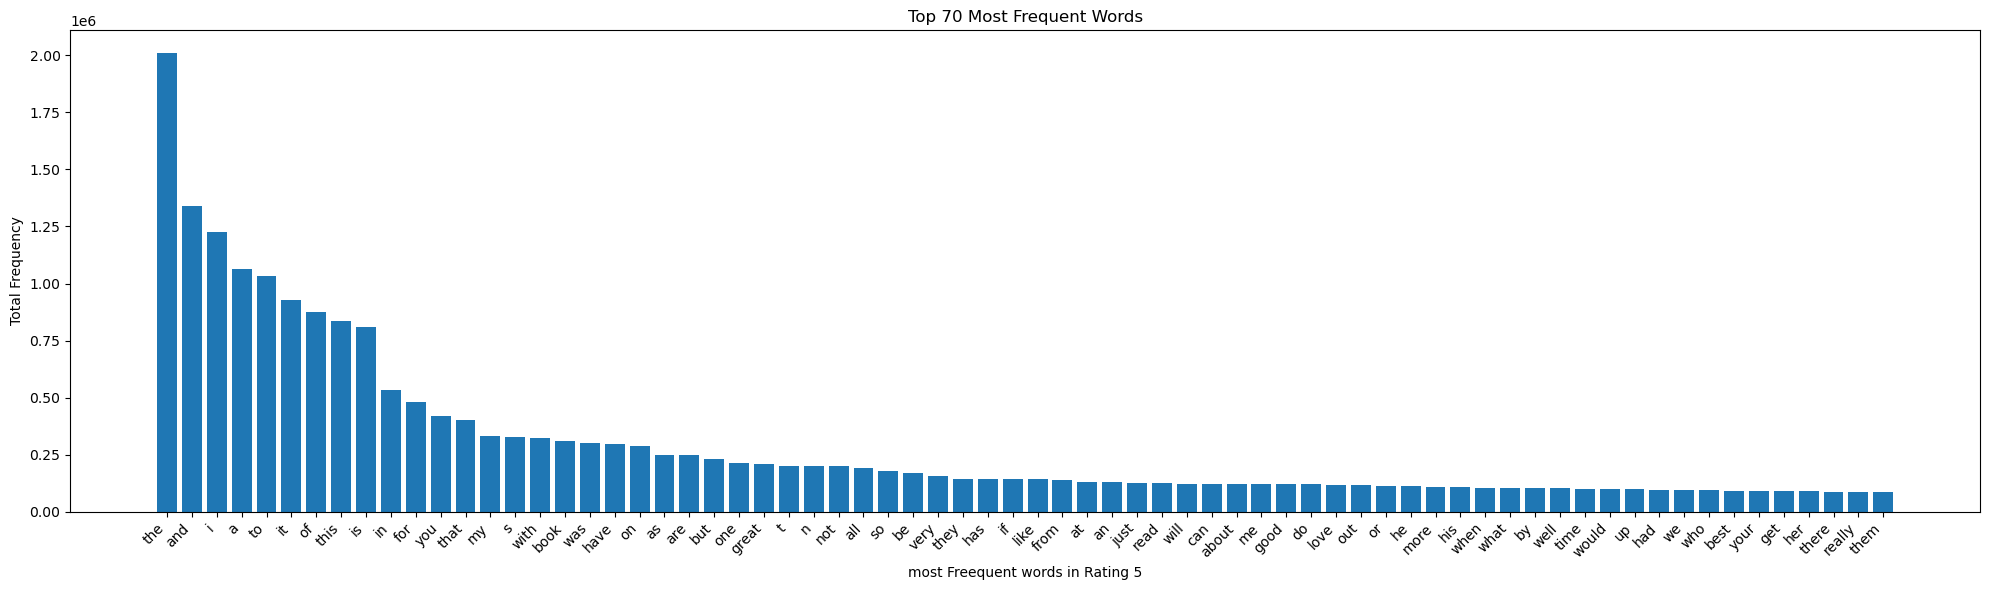

In [37]:
# most Freequent words in Rating 5
get_top_most_frequent_words(data[data['Rating']==5]['Review_word_tokenize'],70, "most Freequent words in Rating 5" ) 

In [38]:
# similarly do for idividual rating

# Univariate analysis

#### Review_str_len

In [39]:
print("\nReview Length Statistics:\n", data['Review_str_len'].describe())


Review Length Statistics:
 count    3.000000e+06
mean     4.140307e+02
std      2.368867e+02
min      4.000000e+00
25%      2.130000e+02
50%      3.670000e+02
75%      5.800000e+02
max      1.010000e+03
Name: Review_str_len, dtype: float64


Count (3,000,000) → The dataset has 3 million reviews, a large sample size for analysis.

Mean (414.03) → The average review length is 414 characters.

Standard Deviation (236.89) → There’s moderate variability in review lengths.

Minimum (4) → The shortest review contains only 4 characters, possibly very brief feedback.

25th Percentile (213) → 25% of reviews are shorter than 213 characters.

Median (367) → The middle review length is 367 characters, meaning half of the reviews are shorter and half are longer.

75th Percentile (580) → 75% of reviews are shorter than 580 characters.

Maximum (1010) → The longest review is 1010 characters, suggesting some users write very detailed feedback.

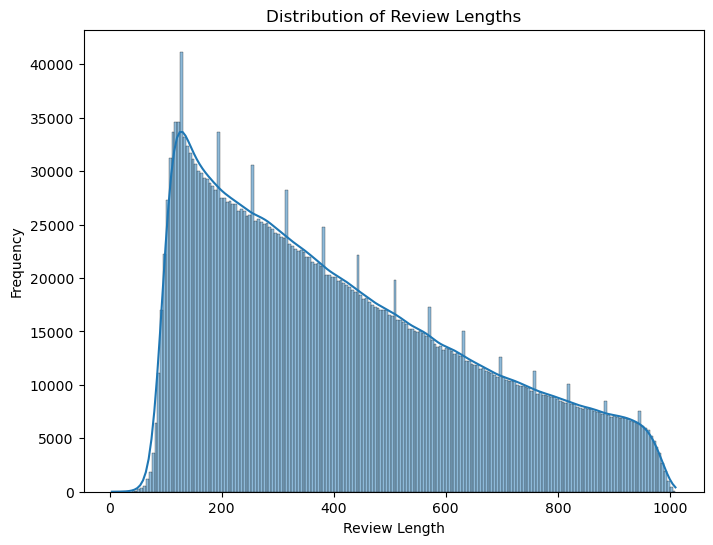

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Review_str_len'], kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

It is a right-skewed distribution, meaning most reviews are short to moderate in length, but there are some longer reviews that extend the range.

#### specific word frequency column (e.g., 'good')

In [41]:
print("\n'good' Frequency Statistics:\n", data['good'].describe())


'good' Frequency Statistics:
 count    3.000000e+06
mean     6.127520e-02
std      1.348366e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: good, dtype: float64


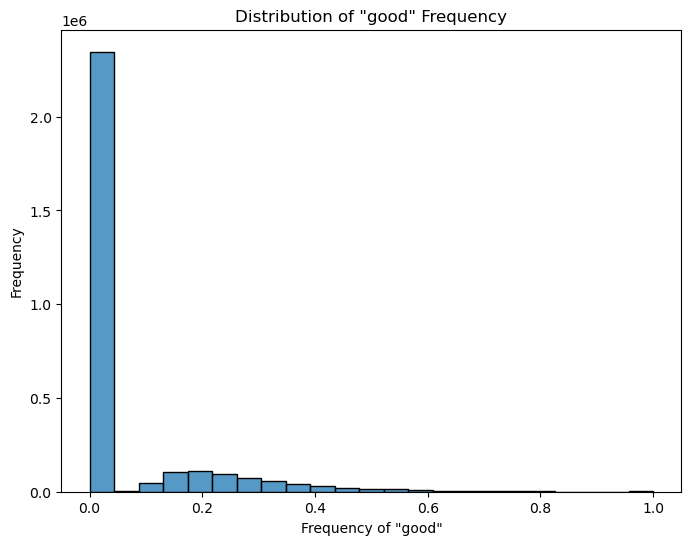

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(data['good'], kde=False)
plt.title('Distribution of "good" Frequency')
plt.xlabel('Frequency of "good"')
plt.ylabel('Frequency')
plt.show()

# Correlation

In [43]:
# Compute Pearson correlation matrix for numerical features
numerical_features = ['Review_str_len', 'Title_str_len', 'title_wtoken_cnt', 'Review_wtoken_cnt', 'review_removed_cnt']
corr_matrix = data[numerical_features + ['Rating']].corr(method='pearson')

print("Pearson Correlation with Rating:\n", corr_matrix['Rating'])

Pearson Correlation with Rating:
 Review_str_len       -0.056518
Title_str_len        -0.003535
title_wtoken_cnt     -0.019742
Review_wtoken_cnt    -0.060397
review_removed_cnt   -0.040299
Rating                1.000000
Name: Rating, dtype: float64


##### Analysis
Review_str_len (-0.0565)	Slight negative correlation—longer reviews may slightly correlate with lower ratings.
Title_str_len (-0.0035)	Very weak correlation—title length barely affects rating.
title_wtoken_cnt (-0.0197)	Weak correlation—number of words in the title has little impact on rating.
Review_wtoken_cnt (-0.0604)	Slight negative correlation—longer reviews might slightly lean toward lower ratings.
review_removed_cnt (-0.0464)	Weak negative correlation—removed words (stop words, etc.) do not strongly impact rating.

Cramers V

In [44]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

categorical_features = ['Rating_Sentiment', 'Review_Title']
for feature in categorical_features:
    print(f"Cramér's V between Rating and {feature}: {cramers_v(data[feature], data['Rating'])}")

Cramér's V between Rating and Rating_Sentiment: 1.0
Cramér's V between Rating and Review_Title: 0.9012692785702842


Most Common Words (Bar Chart for Top N Words):

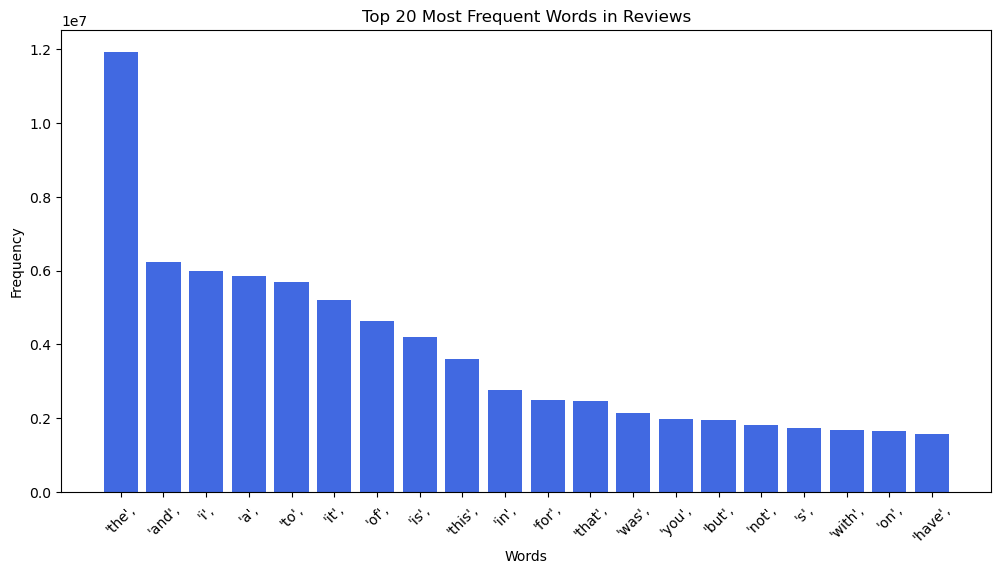

In [45]:
word_counts = Counter(" ".join(data['Cleaned_Review']).split())
top_n_words = dict(word_counts.most_common(20))

plt.figure(figsize=(12,6))
plt.bar(top_n_words.keys(), top_n_words.values(), color='royalblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

#### calculation of Lexical Diversity (the ratio of unique words to total words in a review)

In [46]:
data['lexical_diversity'] = data['Review_word_tokenize'].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)

In [47]:
#### Analyze Lexical Diversity by Rating

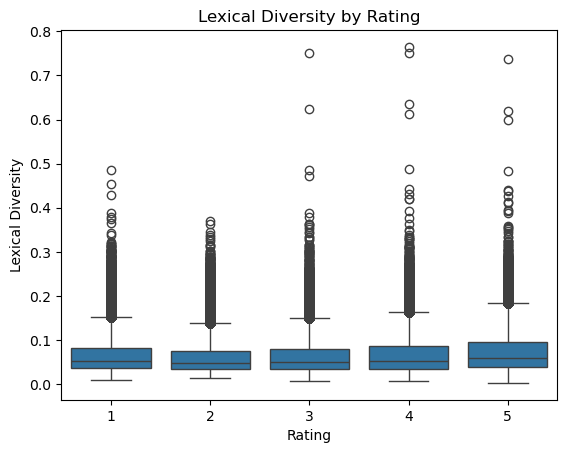

In [48]:
sns.boxplot(x=data['Rating'], y=data['lexical_diversity'])
plt.title("Lexical Diversity by Rating")
plt.xlabel("Rating")
plt.ylabel("Lexical Diversity")
plt.show()

In [49]:
#### Analyze Lexical Diversity by Sentiment

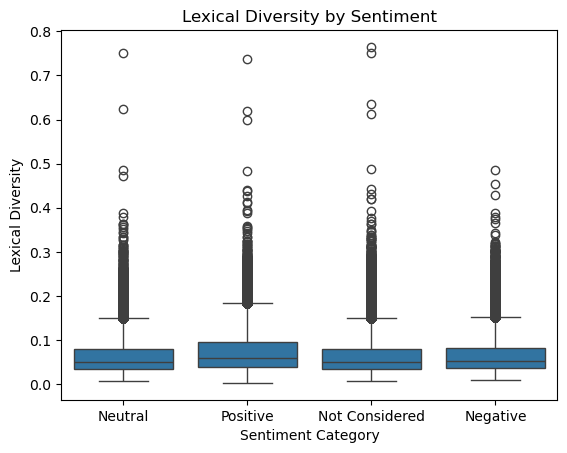

In [50]:
sns.boxplot(x=data['Rating_Sentiment'], y=data['lexical_diversity'])
plt.title("Lexical Diversity by Sentiment")
plt.xlabel("Sentiment Category")
plt.ylabel("Lexical Diversity")
plt.show()

In [51]:
#### Compute Averages for Different Categories

In [52]:
print(data.groupby("Rating")["lexical_diversity"].mean())
print(data.groupby("Rating_Sentiment")["lexical_diversity"].mean())

Rating
1    0.064132
2    0.059432
3    0.061992
4    0.065207
5    0.071046
Name: lexical_diversity, dtype: float64
Rating_Sentiment
Negative          0.064132
Neutral           0.061992
Not Considered    0.062319
Positive          0.071046
Name: lexical_diversity, dtype: float64


In [62]:
word_columns = [col for col in data.columns if col not in ['Rating', 'Rating_Sentiment', 'Review_Title', 'Review', 'Review_str_len', 'Title_str_len', 'title_word_tokenize', 'Review_word_tokenize', 'title_wtoken_cnt', 'Review_wtoken_cnt', 'Cleaned_Review', 'review_punc_stop_words_removed', 'review_removed_cnt', 'porterStemmer', 'WordNet_Lemmatizer','likert_scale']]

In [63]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(data[word_columns])

# Add PCA results to DataFrame
data['PCA1'], data['PCA2'] = tfidf_pca[:, 0], tfidf_pca[:, 1]

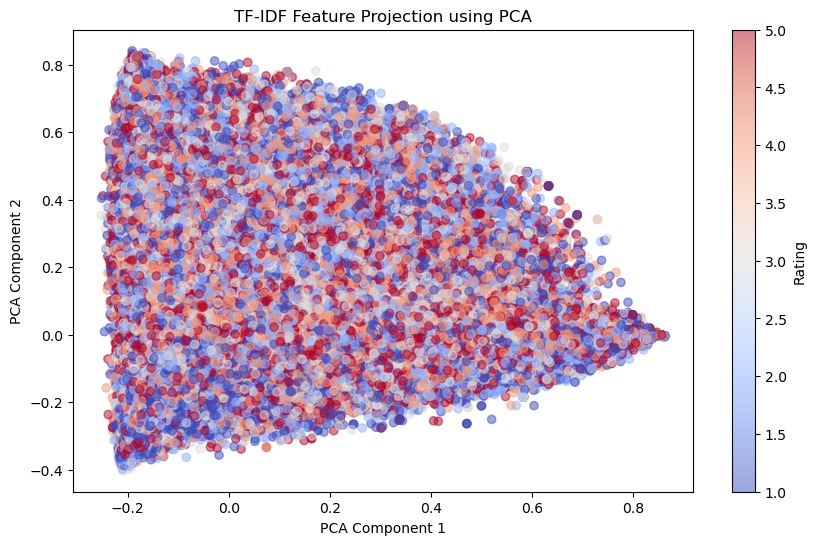

In [61]:
# Scatter plot by Rating
plt.figure(figsize=(10,6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Rating'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label="Rating")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("TF-IDF Feature Projection using PCA")
plt.show()